<a href="https://colab.research.google.com/github/debbor5/datasetfinal/blob/main/tp_debora_bordon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Educacion en República Argentina- 2023

#### El presente proyecto tiene como objetivo analizar la situación educativa en la República Argentina a partir de datos obtenidos del portal oficial del Gobierno de la Nación Argentina: https://datos.gob.ar/dataset. El estudio se basa en los diez principales centros urbanos del país, determinados según el Censo Nacional de Población, Hogares y Viviendas 2022, elaborado por el Instituto Nacional de Estadística y Censos (INDEC).
#### Estos aglomerados: Gran Buenos Aires, Ciudad Autónoma de Buenos Aires, Ciudad de Córdoba Capital, Rosario, Ciudad de Mendoza Capital, San Miguel de Tucumán, Ciudad de Santa Fe Capital, La Plata, Ciudad de Salta Capital y General Pueyrredon, concentran la mayor parte de la población nacional y reflejan la diversidad social, económica y cultural del territorio argentino.
#### Según el mencionado Censo Nacional de Población, los centros urbanos se ubican en las siguientes posiciones:
##### 1. Gran Buenos Aires
##### 2. Ciudad de Buenos Aires
##### 3. Córdoba Capital
##### 4. Rosario
##### 5. Mendoza Capital
##### 6. San Miguel de Tucumán
##### 7. Santa Fe Capital
##### 8. La Plata
##### 9. Salta Capital
##### 10. General Pueyrredon
#### El análisis se orienta a examinar la relación entre centro urbano y tipo de institución educativa (estatal o privada), con el propósito de identificar diferencias y patrones en el ingreso al sistema educativo de la población. Para esto, se procederá al análisis de la base de datos que incluye la totalidad de las matrículas de inscripciones de la población estudiantil en el año 2023. La información se encuentra clasificadas por provincia, departamento, sector de gestión, ámbito, y grado en el cual se efectuó la inscripción.
#### De este modo, y luego de proceder a la limpieza, normalización, análisis y mediante diversos gráficos, se busca aportar una visión integral sobre las desigualdades y desafíos que enfrenta la educación en los principales núcleos urbanos del país, contribuyendo al desarrollo de políticas y estrategias que promuevan una mayor equidad educativa.


## Hipótesis

#### En los centro urbanos con mayor desarrollo económico, la proporción de matrículas en instituciones privadas es significativamente mayor que en los centros urbanos con menor desarrollo.

## Hipótesis Nula

#### El tipo de gestión Pública o Privada es independiente del centro urbano

## Objetivo General

#### Analizar cómo varia la elección del tipo de gestión educativa (pública o privada) según el centro urbano, considerando la edad y el grado de los alumnos inscriptos

## Objetivos Específicos

#### 1. Comparar la proporción de alumnos inscriptos en gestión privada versus la gestión estatal.
#### 2. Evaluar si la edad o el grado de los alumnos se asocia con un tipo de gestión en particular.
#### 3. Identificar patrones de desigualdad en el acceso a la educación pública y privada de acuerdo a la locación.

In [41]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif,f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
# Carga de Dataset
df= pd.read_csv("https://raw.githubusercontent.com/debbor5/datasetfinal/refs/heads/main/2023%20Matricula%20por%20edad%20en%20principales%20centros%20urbanos.csv" , sep= ";" )


In [43]:
print(df.head())

        centrourbano     departamento   sector  ambito    grado  0años   1año  \
0  Gran Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano       1°                 
1  Gran Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano      10°                 
2  Gran Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano      11°                 
3  Gran Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano      12°                 
4  Gran Buenos Aires  ALMIRANTE BROWN  Estatal  Urbano  13°/14°                 

   2años  3años  4años  ... 22años 23años 24años 25años 26años 27años 28años  \
0                       ...                                                    
1                       ...                                                    
2                       ...                                                    
3                       ...                                                    
4                       ...                                                    

  29años 30añosymás TotalAlumnos

In [44]:
df.shape

(2008, 37)

In [45]:
df.columns

Index(['centrourbano', 'departamento', 'sector', 'ambito', 'grado', '0años',
       '1año', '2años', '3años', '4años', '5años', '6años', '7años', '8años',
       '9años', '10años', '11años', '12años', '13años', '14años', '15años',
       '16años', '17años', '18años', '19años', '20años', '21años', '22años',
       '23años', '24años', '25años', '26años', '27años', '28años', '29años',
       '30añosymás', 'TotalAlumnos'],
      dtype='object')

In [46]:
# Genero una lista de columnas para utilizar en mi DataFrame
# Convierto cualquier valor inválido a NAN
# Reemplazo los NAN por 0 (cero)
# Finalmente convierto todos los números a tipo enteros


cols = ["0años", "1año", "2años", "3años","4años", "5años", "6años", "7años", "8años", "9años", "10años", "11años", "12años", "13años", "14años", "15años", "16años", "17años", "18años", "19años", "20años", "21años", "22años", "23años", "24años", "25años", "26años", "27años", "28años", "29años", "30añosymás", "TotalAlumnos"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print (df[cols])

      0años  1año  2años  3años  4años  5años  6años  7años  8años  9años  \
0         0     0      0      0      0      0   5842     19      2      0   
1         0     0      0      0      0      0      0      0      0      0   
2         0     0      0      0      0      0      0      0      0      0   
3         0     0      0      0      0      0      0      0      0      0   
4         0     0      0      0      0      0      0      0      0      0   
...     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
2003      0     0    787      0      0      0      0      0      0      0   
2004      0     0      0   1752      2      0      0      0      0      0   
2005      0     0      0      0   3139      2      0      0      0      0   
2006      0     0      0      0      0   2795      0      0      0      0   
2007      0     0      0      0      0      0      0      0      0      0   

      ...  22años  23años  24años  25años  26años  27años  28años  29años  

In [47]:
df.dtypes

,0
centrourbano,object
departamento,object
sector,object
ambito,object
grado,object
0años,int64
1año,int64
2años,int64
3años,int64
4años,int64


In [48]:
# Configuro la visualización
sns.set_theme(style="darkgrid")

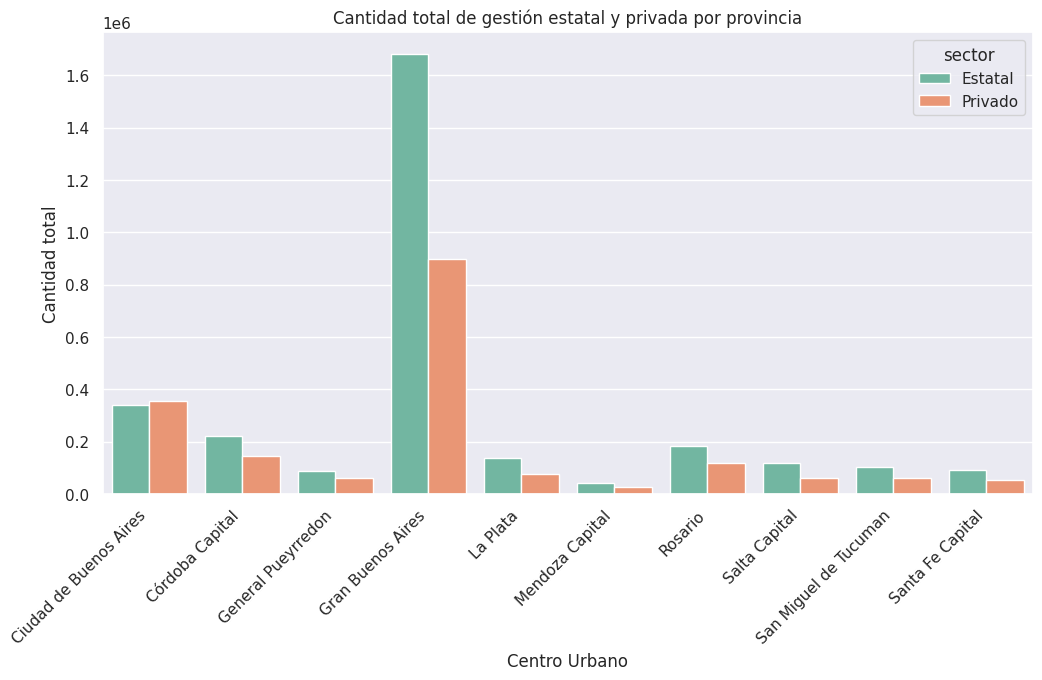

In [83]:
# Agrupo por centro urbano y sector, y sumo la columna total creada en el paso anterior
# Genero el grafico de barras

df_agrupado = (df.groupby(["centrourbano", "sector"], as_index=False).agg({"TotalAlumnos": "sum"}))

plt.figure(figsize=(12,6))
sns.barplot(data=df_agrupado,
    x="centrourbano",
    y="TotalAlumnos",
    hue="sector",
    palette="Set2")

plt.title("Cantidad total de gestión estatal y privada por provincia")
plt.ylabel("Cantidad total")
plt.xlabel("Centro Urbano")
plt.xticks(rotation=45, ha="right")
plt.show()


## Preparación de datos

### Agrupación de Sector por Centro Urbano

In [51]:
pivot = df_agrupado.pivot(
    index="centrourbano",
    columns="sector",
    values="TotalAlumnos"
).fillna(0)

print(pivot)

sector                  Estatal  Privado
centrourbano                            
Ciudad de Buenos Aires   340208   355582
Córdoba Capital          222554   146503
General Pueyrredon        89365    62671
Gran Buenos Aires       1681163   898887
La Plata                 136692    75140
Mendoza Capital           40771    24812
Rosario                  185104   116784
Salta Capital            116857    62058
San Miguel de Tucuman    103975    59830
Santa Fe Capital          91785    52275


### Cálculo de proporción



In [52]:
pivot["total"] = pivot["Estatal"] + pivot["Privado"]
pivot["prop_privado"] = pivot["Privado"] / pivot["total"]

### Mapeo de nivel de desarrollo según Censo Nacional 2022

In [54]:
mapa_desarrollo = {
    "Gran Buenos Aires": 1,
    "Ciudad de Buenos Aires": 2,
    "Córdoba Capital": 3,
    "Rosario": 4,
    "Mendoza Capital": 5,
    "San Miguel de Tucuman": 6,
    "Santa Fe Capital": 7,
    "La Plata": 8,
    "Salta Capital": 9,
    "General Pueyrredon": 10,
}

pivot["desarrollo"] = pivot.index.map(mapa_desarrollo)

print (pivot)


sector                  Estatal  Privado    total  prop_privado  desarrollo
centrourbano                                                               
Ciudad de Buenos Aires   340208   355582   695790      0.511048           2
Córdoba Capital          222554   146503   369057      0.396966           3
General Pueyrredon        89365    62671   152036      0.412212          10
Gran Buenos Aires       1681163   898887  2580050      0.348399           1
La Plata                 136692    75140   211832      0.354715           8
Mendoza Capital           40771    24812    65583      0.378330           5
Rosario                  185104   116784   301888      0.386845           4
Salta Capital            116857    62058   178915      0.346857           9
San Miguel de Tucuman    103975    59830   163805      0.365251           6
Santa Fe Capital          91785    52275   144060      0.362870           7


### Clasificación de Desarrollo

In [56]:
# CLASIFICO:
# Bajo:  1–4
# Medio: 5–7
# Alto:  8–10

def clasificar_desarrollo(d):
    if d <= 4:
        return 0   # Bajo
    elif d <= 7:
        return 1   # Medio
    else:
        return 2   # Alto

pivot["desarrollo_cat"] = pivot["desarrollo"].apply(clasificar_desarrollo)

print (pivot)


sector                  Estatal  Privado    total  prop_privado  desarrollo  \
centrourbano                                                                  
Ciudad de Buenos Aires   340208   355582   695790      0.511048           2   
Córdoba Capital          222554   146503   369057      0.396966           3   
General Pueyrredon        89365    62671   152036      0.412212          10   
Gran Buenos Aires       1681163   898887  2580050      0.348399           1   
La Plata                 136692    75140   211832      0.354715           8   
Mendoza Capital           40771    24812    65583      0.378330           5   
Rosario                  185104   116784   301888      0.386845           4   
Salta Capital            116857    62058   178915      0.346857           9   
San Miguel de Tucuman    103975    59830   163805      0.365251           6   
Santa Fe Capital          91785    52275   144060      0.362870           7   

sector                  desarrollo_cat  
centrourba

### Desarrollo vs proporción privada (scatter)

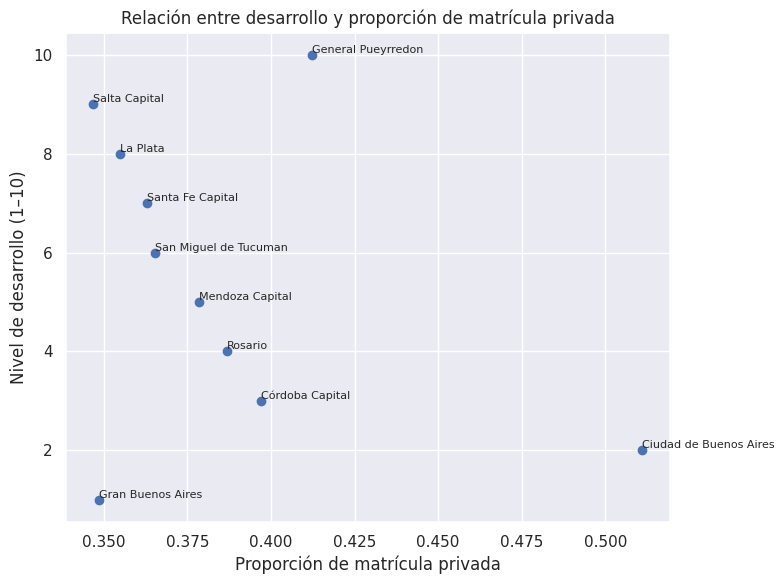

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(pivot["prop_privado"], pivot["desarrollo"])
for nombre, fila in pivot.iterrows():
    plt.text(fila["prop_privado"], fila["desarrollo"], nombre, fontsize=8, ha="left", va="bottom")
plt.xlabel("Proporción de matrícula privada")
plt.ylabel("Nivel de desarrollo (1–10)")
plt.title("Relación entre desarrollo y proporción de matrícula privada")
plt.tight_layout()
plt.show()

### Proporción Privada por centro urbano

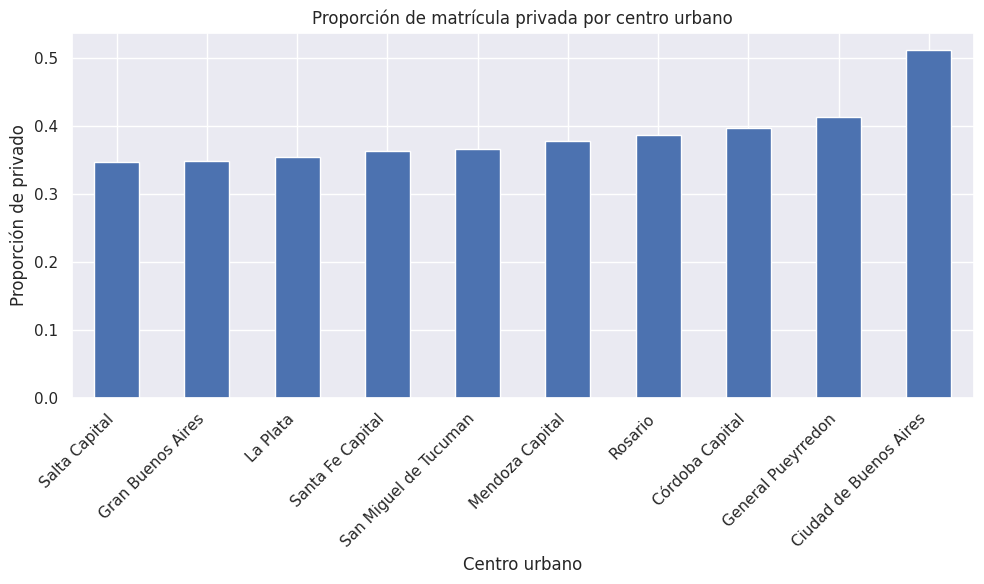

In [58]:
plt.figure(figsize=(10, 6))
pivot["prop_privado"].sort_values().plot(kind="bar")
plt.title("Proporción de matrícula privada por centro urbano")
plt.xlabel("Centro urbano")
plt.ylabel("Proporción de privado")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Matrícula Estatal vs Privada

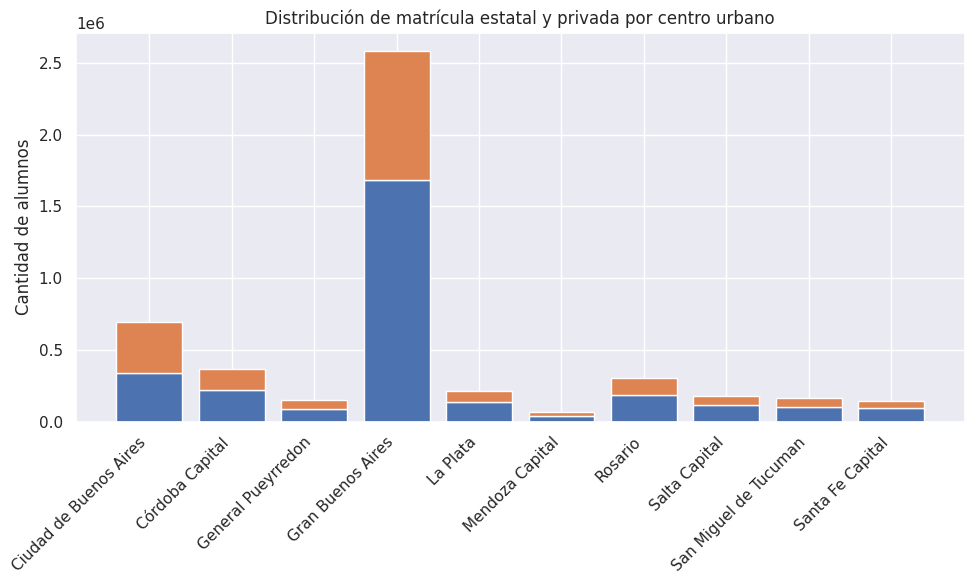

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(pivot.index, pivot["Estatal"])
plt.bar(pivot.index, pivot["Privado"], bottom=pivot["Estatal"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cantidad de alumnos")
plt.title("Distribución de matrícula estatal y privada por centro urbano")
plt.tight_layout()
plt.show()

### Definición de Variables

In [60]:
X = pivot[["Estatal", "Privado", "total", "prop_privado"]]
y = pivot["desarrollo_cat"]  # Variable objetivo

print("Centros urbanos y clases:")
print(pivot[["desarrollo", "desarrollo_cat"]])

Centros urbanos y clases:
sector                  desarrollo  desarrollo_cat
centrourbano                                      
Ciudad de Buenos Aires           2               0
Córdoba Capital                  3               0
General Pueyrredon              10               2
Gran Buenos Aires                1               0
La Plata                         8               2
Mendoza Capital                  5               1
Rosario                          4               0
Salta Capital                    9               2
San Miguel de Tucuman            6               1
Santa Fe Capital                 7               1


### División de Datos (Train/Test Split)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [62]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (7, 4)
Tamaño del conjunto de prueba (X_test): (3, 4)
Tamaño del conjunto de entrenamiento (y_train): (7,)
Tamaño del conjunto de prueba (y_test): (3,)


### Construcción y Entrenamiento del Modelo (Random Forest Classifier)

In [63]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feat", SelectKBest(score_func=f_classif, k="all")),
    ("rf", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced"
    )),
])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('feat', SelectKBest(k='all')),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, random_state=42))])

### Predicciones

In [67]:
y_pred = pipeline.predict(X_test)
print (y_pred)

[2 0 1]


### Evaluación del Modelo

### Accuracy

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

Accuracy Score
Accuracy en el conjunto de prueba: 0.6667


### Confusion Matrix

Matriz de Confusión


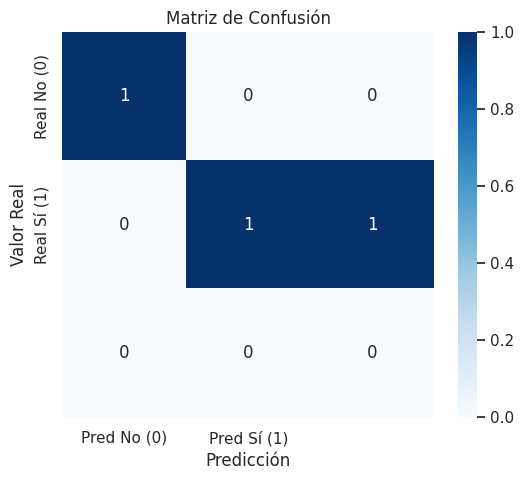

Verdaderos Negativos (TN): 1
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0
Verdaderos Positivos (TP): 1


In [71]:
print("Matriz de Confusión")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No (0)', 'Pred Sí (1)'], yticklabels=['Real No (0)', 'Real Sí (1)'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()
print(f"Verdaderos Negativos (TN): {cm[0,0]}")
print(f"Falsos Positivos (FP): {cm[0,1]}")
print(f"Falsos Negativos (FN): {cm[1,0]}")
print(f"Verdaderos Positivos (TP): {cm[1,1]}")

### Modelo (Random Forest Regressor)

### Definir Features y Target

In [73]:
X = pivot[["Estatal", "Privado", "total", "prop_privado"]]
y = pivot["desarrollo"]

### División de Datos (Train/Test Split)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (7, 4)
Tamaño del conjunto de prueba (X_test): (3, 4)
Tamaño del conjunto de entrenamiento (y_train): (7,)
Tamaño del conjunto de prueba (y_test): (3,)


### Costrucción y selección de features

In [75]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feat", SelectKBest(score_func=f_regression, k='all')),
    ("rf", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
    ))])

### Entrenar Modelo

In [76]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feat',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7e012e5eeb60>)),
                ('rf',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

### Predicciones

In [78]:
y_pred = pipeline.predict(X_test)
print (y_pred)

[8.39       5.54333333 8.14      ]


## Evaluación del Modelo

### Métricas de regresión

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MÉTRICAS")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MÉTRICAS
MAE: 2.6911111111111112
MSE: 7.3467481481481505
RMSE: 2.710488544183161
R²: -3.722909523809526


## Análisis de importancia de Características

In [81]:
importances = pipeline.named_steps['rf'].feature_importances_

print("IMPORTANCIA DE VARIABLES")
for feat, imp in zip(X.columns, importances):
    print(f"{feat}: {imp}")

IMPORTANCIA DE VARIABLES
Estatal: 0.3144011864983345
Privado: 0.31708208474157584
total: 0.30448609826926326
prop_privado: 0.06403063049082654


## Conclusiones del modelo de Clasificación (Random Forest Classifier)

####Los centros urbanos con mayor desarrollo real muestran en general, mayor proporción de matrícula privada. Para mi análisis clasifiqué los centros urbanos en bajo / medio / alto desarrollo, basándome en el último Censo Nacional del año 2022. Los centros urbanos más desarrollados (como CABA, Rosario, Córdoba Capital) exhiben proporciones de matrícula privada mayores que los centros menos desarrollados.
#### Si bien el dataset tiene pocos casos (solo 10 centros urbanos), el Modelo Random Forest Classifier logró reconocer grupos según desarrollo.
#### Por otro lado, los centros urbanos menos desarrollados concentran proporcionalmente mayor matrícula estatal, es decir: el predominio estatal está asociado a niveles más bajos de desarrollo.
####La relación entre desarrollo urbano y composición del sector educativo también se evidencia en la predicción del modelo.
#### Por lo antedicho, el modelo confirma mi Hipóstesis Central.

## Conclusiones del modelo de Regresión (Random Forest Regressor)

#### El modelo pudo predecir el nivel de desarrollo (del 1 al 10 ) con un error bajo para la escala disponible. La relación entre Desarrollo de Centro Urbano y matriculación en Sector Privado de educación no es lineal. Una regresión lineal hubiera asumido una línea recta entre matrícula privada y desarrollo, cosa que no existe en el mundo real.

## Conclusiones Generales

### En ambos modelos (clasificación y regresión) la conclusión es consistente:
### Los centros urbanos con mayor desarrollo económico tienen una mayor proporción de matrícula privada.
### Ambos modelos supervisados lo demuestran desde dos enfoques distintos:
### Clasificación: muestra que la proporción privada es suficiente para ubicar ciudades en grupos de desarrollo (bajo, medio, alto).
### Regresión: predice directamente el valor de 1 a 10 del desarrollo usando esa misma estructura educativa.